<a href="https://colab.research.google.com/github/forsythe-KE/AI-projects/blob/main/classfication_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**# Custom Vision Exercise 1
## Creating a classification model using the Python SDK
In this first part of the lab session, we are going to create a classification model programmatically using Python and attempt to create a custom classification model.

## Prerequisites

* Have an active Azure Subscription - Click here to get a [FREE subscription for all students](https://azure.microsoft.com/free/students?wt.mc_id=studentamb_223887) or [Start free with  Azure today](https://azure.microsoft.com?wt.mc_id=studentamb_223887)

* [Create an Azure Custom Vision Resource](https://portal.azure.com/#create/Microsoft.CognitiveServicesCustomVision)

## 1. Install all the necessary packages needed for the lab.

These commands are also applicable on Azure AI Machine Learning Studio notebooks. <i><b>Note: If you are using your local machine for development with VS Code you will need to create an environment for coding then install these packages with the same commands without the "!" mark.</b></i>

In [ ]:
!pip install azure-cognitiveservices-vision-customvision
#to handle our authentication
!pip install msrest
#to load our environmental variables if you are using your local development environment
!pip install python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 967.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


## 2. We then import all the necessary libraries & configure environmental variables

From custom vision python package we ought to install CustomVisionTrainingClient and CustomVisionPredictionClient from training and prediction respectfully. From the models inside training we then grab ImageFileCreateBatch, ImageFileCreateEntry, Region.

In [ ]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid
# with this add a .env file in the root of your directory
#from dotenv import load_dotenv

In [ ]:
# retrieve environment variables (if you are using a .env file )
"""
ENDPOINT = os.environ["VISION_TRAINING_ENDPOINT"]
training_key = os.environ["VISION_TRAINING_KEY"]
prediction_key = os.environ["VISION_PREDICTION_KEY"]
prediction_resource_id = os.environ["VISION_PREDICTION_RESOURCE_ID"]
"""

'\nENDPOINT = os.environ["VISION_TRAINING_ENDPOINT"]\ntraining_key = os.environ["VISION_TRAINING_KEY"]\nprediction_key = os.environ["VISION_PREDICTION_KEY"]\nprediction_resource_id = os.environ["VISION_PREDICTION_RESOURCE_ID"]\n'

In [ ]:
#if you want just to test out things and see how it goes, you might want to use this
# retrieve environment variables
TRAIN_ENDPOINT="https://deviceimageprocessing2.cognitiveservices.azure.com/"
PRED_ENDPOINT = "https://deviceimageprocessing2-prediction.cognitiveservices.azure.com/"
prediction_key = "0375a5dacf73443980f7db04581befc1"
training_key = "acd302f4e2494e2a9e0caf4a9c54ba67"
resource_region="eastus"
prediction_resource_id = "/subscriptions/790acce3-abb9-465e-8a96-ae23258961a4/resourceGroups/ml-apps/providers/Microsoft.CognitiveServices/accounts/deviceImageProcessing2"

## 3. Create and Authenticate the Client

Instantiate a training and prediction client with your endpoint and keys. Create ApiKeyServiceClientCredentials objects with your keys, and use them with your endpoint to create a CustomVisionTrainingClient and CustomVisionPredictionClient object.

In [ ]:
credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(TRAIN_ENDPOINT, credentials)
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(PRED_ENDPOINT, prediction_credentials)

## 4. Create a New Custom Vision Project
This now illustrates how to programmatically create a custom vision project contrary to our previous approach to go to the portal. You can skip this part if you already have a model. But because this is a lab, I <strong><i>strongly advice you to code along with your instructor to learn more.</i></strong>

In [ ]:
publish_iteration_name = "deviceImageProcessingModel" #name of the published model

try:
    # Create a new project
    print("New project is being created, please wait 😊....")
    project_name = str(uuid.uuid4())  # Convert the UUID to a string
    project = trainer.create_project(project_name)

    # Check if the process was successful
    if not project:
        print(f"Failed to create project {project_name} 😭😭")
    else:
        print(f"🎉🥳 Successfully created your project: {project_name}")

except Exception as e:
    print(f"Something broke 😭, here's the error ☠️: {e}")


New project is being created, please wait 😊....
Something broke 😭, here's the error ☠️: Operation returned an invalid status code 'PermissionDenied'


Incase you are not creating a new project but just want to add an existing project.

In [ ]:
#project  = trainer.get_project('<project_id>') #replace this with your own project ID

if not project:
  print(f"Could not find a project with specified ID")
else:
  print(f"Project {project.name} found successfully")

NameError: name 'project' is not defined

## 5. Add Tags for Classification
These tags work as the labels given to classify images into distinct groups.

In [ ]:
# Make two tags in the new project
smartphone_tag = trainer.create_tag(project.id, "smartphone")
laptop_tag = trainer.create_tag(project.id, "laptop")
print(f"Tag ids:\n{smartphone_tag.id}\n{laptop_tag.id}")

NameError: name 'project' is not defined

In [ ]:
#to delete tags you don't use anymore
#trainer.delete_tag(project.id,some_tag.id)

## 6. Uploading and tagging Images

A limit of upto 64 images is allowed per batch.

## Mount Google Drive

Before we can add our images we need to mount our google drive. This step is optional, you can decide to just create a new folder and upload your images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_image_location = os.path.join(os.getcwd(), "/content/drive/My Drive/Images")


print("Adding images...")

image_list = []

for image_num in range(1, 10):
    file_name = f"laptop ({image_num}).jpg"
    with open(os.path.join (base_image_location, "laptop", file_name), "rb") as image_contents:
        image_list.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), tag_ids=[laptop_tag.id]))

for image_num in range(1, 10):
    file_name = f"phone ({image_num}).jpg"
    with open(os.path.join (base_image_location, "phone", file_name), "rb") as image_contents:
        image_list.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), tag_ids=[smartphone_tag.id]))

upload_result = trainer.create_images_from_files(project.id, ImageFileCreateBatch(images=image_list))
if not upload_result.is_batch_successful:
    print("Image batch upload failed.")
    for image in upload_result.images:
        print("Image status: ", image.status)
    exit(-1)

Adding images...


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Images/laptop/laptop (1).jpg'

## 7. Train the Project

In [ ]:
print ("Training...")

try:
  iteration = trainer.train_project(project.id)
  while (iteration.status != "Completed"):
      iteration = trainer.get_iteration(project.id, iteration.id)
      print ("Training status: " + iteration.status)
      print ("Waiting 10 seconds...")
      time.sleep(10)

except Exception as e:
  print(f"There's an error 😭: {e}")


Training...
There's an error 😭: name 'project' is not defined


## Publish the current iteration

In [ ]:
# The iteration is now trained. Publish it to the project endpoint
publish_iteration_name = "deviceImageProcessingModel" #name of the published model
trainer.publish_iteration(project.id, iteration.id, publish_iteration_name, prediction_resource_id)
print ("Done!")

NameError: name 'project' is not defined

## Making our prediction, classifying an example image

In [ ]:
# Now there is a trained endpoint that can be used to make a prediction
publish_iteration_name = "deviceImageProcessingModel" #name of the published model
base_image_location = os.path.join(os.getcwd(), "/content/drive/My Drive/Images/Test")

with open(os.path.join (base_image_location, "test_image.jpg"), "rb") as image_contents:
    results = predictor.classify_image(
        project.id, publish_iteration_name, image_contents.read())

    # Display the results.
    for prediction in results.predictions:
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))

	smartphone: 99.79%
	laptop: 0.21%


## 🎊🕺🏾Congratulations, you have completed your Lab 1 session.💃🏿🎊
Give yourself a pat on the back. You have now gained basic knowledge on how to use custom vision. Remember the road does not stop herre, it's only just the beginning.

Read More About the SDK Here:
https://learn.microsoft.com/python/api/azure-cognitiveservices-vision-customvision/azure.cognitiveservices.vision.customvision.training.operations.customvisiontrainingclientoperationsmixin?view=azure-python#azure-cognitiveservices-vision-customvision-training-operations-customvisiontrainingclientoperationsmixin-delete-iteration&wt.mc_id=studentamb_223887

## Cleaning up
### Deleting the current iteration and the entire project
If you are not planning to take this model further, or you need a fresh start without other projects reminding you of the "nightmare you created 😨" 😂. Then you can go ahead and clean up. This step is completely optional.

In [ ]:
#you get the published iteration first unpublish it then delete it
#unpublish
trainer.unpublish_iteration(project.id,iteration.id)
#delete the iteration
trainer.delete_iteration(project.id,iteration.id)

In [ ]:
#you can then decide whether you want to delete the project or not
trainer.delete_project(project.id)

Now for safety issues you have to unmount your google drive.

In [ ]:
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

All changes made in this colab session should now be visible in Drive.


# Custom Vision Exercise 2 (Object Recognition)
This part of the lab requires you to have created a new project and labeled all your images. On the custom vision portal. In this case we will be using the starbucks detection example.


# Install the required libraries

In [ ]:
!pip install azure-cognitiveservices-vision-customvision

# Create a new Custom Vision Project for Object Detection

Imagine you are tasked with creating an online campaign for Starbucks coffee company and you were to identify areas where most Starbucks houses, trucks and mugs and paper coffeee cup are found. You immediately decide that you can't go through pictures provided to you, instead you will just use object detection.

NOTE, you must perform the annotation and training on vision portal then link the tag name.

In [ ]:
project  = trainer.get_project('60aca413-65db-4b6a-80f4-8eceb10643f2')

In [ ]:
publish_iteration_name = "detectStarbucks"

# Find the object detection domain
obj_detection_domain = next(domain for domain in trainer.get_domains() if domain.type == "ObjectDetection" and domain.name == "General")

# Create a new project
print ("Creating project...")
# Use uuid to avoid project name collisions.
project = trainer.create_project(str(uuid.uuid4()), domain_id=obj_detection_domain.id)

Creating project...


## Add tags to the new project (Personal Challenge - Do this later) [SKIP]
This example requiures you to have known the image object bounding boxes cooordinates. These bounding box coordinates are usually in the format of (xmin, ymin, xmax, ymax).

In [ ]:
# starbucks object with coordinates
"""starbucks_image_regions = {
    "starbucks_1": [ 0.145833328, 0.3509314, 0.5894608, 0.238562092 ],
    "starbucks_2": [ 0.294117659, 0.216944471, 0.534313738, 0.5980392 ],
    "starbucks_3": [ 0.09191177, 0.0682516545, 0.757352948, 0.6143791 ],
    "starbucks_4": [ 0.254901975, 0.185898721, 0.5232843, 0.594771266 ],
    "starbucks_5": [ 0.2365196, 0.128709182, 0.5845588, 0.71405226 ],
    "starbucks_6": [ 0.115196079, 0.133611143, 0.676470637, 0.6993464 ],
    ....
    "starbucks_20": [ 0.180147052, 0.239820287, 0.6887255, 0.235294119 ]
}"""

In [ ]:
"""#uploading the images
base_image_location = os.path.join (os.path.dirname(__file__), "Images")

# Go through the data table above and create the images
print ("Adding images...")
tagged_images_with_regions = []

for file_name in starbucks_image_regions.keys():
    x,y,w,h = starbucks_image_regions[file_name]
    regions = [ Region(tag_id=starbuck_tag.id, left=x,top=y,width=w,height=h) ]

    with open(os.path.join (base_image_location, "fork", file_name + ".jpg"), mode="rb") as image_contents:
        tagged_images_with_regions.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), regions=regions))

upload_result = trainer.create_images_from_files(project.id, ImageFileCreateBatch(images=tagged_images_with_regions))
if not upload_result.is_batch_successful:
    print("Image batch upload failed.")
    for image in upload_result.images:
        print("Image status: ", image.status)
    exit(-1)"""

## Train your project

In [ ]:
#get the object detection project id and use it to refer to the model during training
print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)


Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training


# Test the model

### Create test folder and upload a test images before you execute this code.


In [ ]:
# Now there is a trained endpoint that can be used to make a prediction
base_image_location = os.path.join(os.getcwd(), "Images")

# Open the sample image and get back the prediction results.
with open(os.path.join (base_image_location,"test","test_image.png"), mode="rb") as test_data:
    results = predictor.detect_image(project.id,"Iteration3", test_data)

# Display the results.
preds = []
for prediction in results.predictions:
    preds.append({
        "tag_name": prediction.tag_name,
        "probability": round(prediction.probability, 4),
        "bbox": {
            "left": round(prediction.bounding_box.left, 2),
            "top": round(prediction.bounding_box.top, 2),
            "width": round(prediction.bounding_box.width, 2),
            "height": round(prediction.bounding_box.height, 2),
        }
    })

## Show raw predictions
Show a sample of what we have just created.

In [ ]:
preds[:4]

[{'tag_name': 'starbucks',
  'probability': 0.8873,
  'bbox': {'left': 0.37, 'top': 0.46, 'width': 0.28, 'height': 0.29}},
 {'tag_name': 'starbucks',
  'probability': 0.8211,
  'bbox': {'left': 0.08, 'top': 0.46, 'width': 0.18, 'height': 0.23}},
 {'tag_name': 'starbucks',
  'probability': 0.6907,
  'bbox': {'left': 0.76, 'top': 0.46, 'width': 0.16, 'height': 0.22}},
 {'tag_name': 'starbucks',
  'probability': 0.019,
  'bbox': {'left': 0.65, 'top': 0.42, 'width': 0.22, 'height': 0.29}}]

## Show bounding boxes
To do this we must first of all install Pillow.

In [ ]:
#install pillow via pip
!pip install Pillow
!pip install matplotlib

In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
#must be declared in order to do a count


def drawBoundingBox(image_name,extension):
  starbucks_count = 0
  # Open the image
  image_path = f"./Images/test/{image_name}.{extension}"  # Replace with the actual path to your image
  image = Image.open(image_path)

  # Check if the image is in 'P' mode and convert it to 'RGB'
  if image.mode == 'P':
      image = image.convert('RGB')

  # Create a drawing object
  draw = ImageDraw.Draw(image)

  # Bounding box information
  bounding_boxes = preds

  # Filter bounding boxes based on probability (greater than 66%)
  filtered_bounding_boxes = [bbox_info for bbox_info in bounding_boxes if bbox_info['probability'] > 0.66]

  # Draw bounding boxes on the image for filtered bounding boxes
  for bbox_info in filtered_bounding_boxes:
      tag_name = bbox_info['tag_name']
      probability = bbox_info['probability']
      bbox = bbox_info['bbox']

      #count identified items
      if probability>0.66:
        starbucks_count = starbucks_count + 1

      # Convert relative coordinates to absolute coordinates
      left = bbox['left'] * image.width
      top = bbox['top'] * image.height
      right = (bbox['left'] + bbox['width']) * image.width
      bottom = (bbox['top'] + bbox['height']) * image.height

      # Draw the bounding box
      draw.rectangle([left, top, right, bottom], outline="red", width=2)

      # Add label with tag name and probability
      label = f"{tag_name}: {probability * 100:.2f}%"
      draw.text((left, top - 15), label, fill="red")

  # Save or display the image with bounding boxes
  output_path = f"./Images/output/out_{image_name}.png"  # Replace with the desired output path
  image.save(output_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.show()
  return starbucks_count

## Use the function to identify Starbucks images
Now go into the world and try out different images to detect starbucks in them.

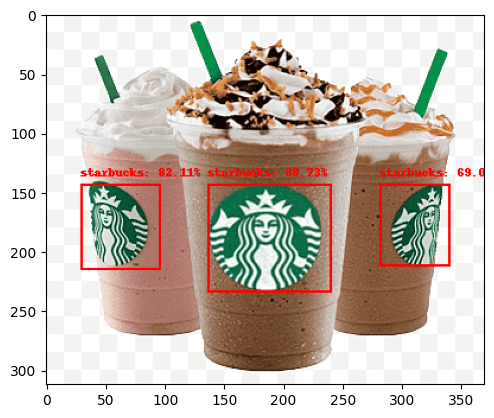

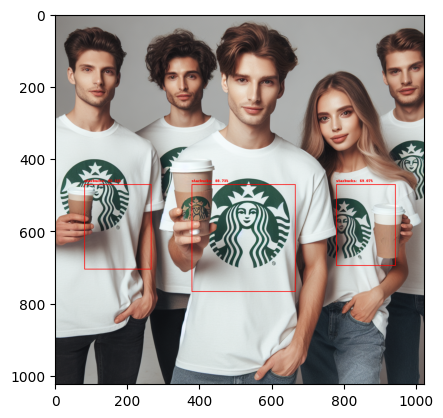

In [ ]:
a = drawBoundingBox("test_image","png")
c = drawBoundingBox("test","jpeg")


## Number of Identified Items

In [ ]:
print(f"Total starbucks count: {a+c}")

Total starbucks count: 6


# Conclusions

Congratulations once more on completing this challenge. If you are stuck remember your neighbour maybe finished - reach out to them for help. So now what? Are you going to do now that today you have acquired a new super power  🚀as a coding super hero 🦸. Let's go save the world. But wait doe your AI model follow ***responsible AI***?


# End Credits
## Behold I show the Image of my 3rd iteration
Here you can clearly see my scores (after nmany attempts),tell me if you scored better I would love to know.


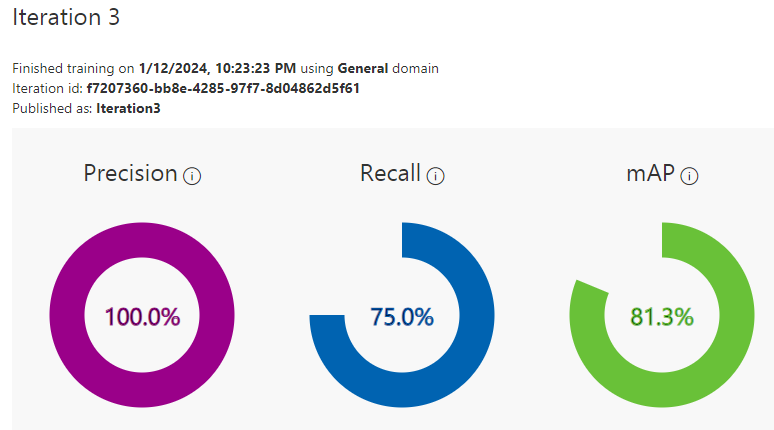